### Step -1 : Import Libraries

In [1]:
import pandas as pd 
import os 
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Step -2 : Import Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,title,content,date,variant,images,verified,author,rating,product,url
0,Defective mobile and poor service,Look wise this is good but it's performance wa...,27-Aug-19,NaN,NaN,Yes,Pankaj kumar Jha,1,Lenovo K6 Note (Silver),https://www.amazon.in/Lenovo-K6-Note-Silver/pr...
1,Poor Experience with Lenovo and Amazon,This product has a very poor performance inter...,30-Nov-17,NaN,NaN,Yes,mani,1,Lenovo K6 Note (Silver),https://www.amazon.in/Lenovo-K6-Note-Silver/pr...
2,Please Don't Buy This Product,"Phone look & design good, I used this phone af...",02-Sep-17,NaN,NaN,Yes,Abdul Wasey,2,Lenovo K6 Note (Silver),https://www.amazon.in/Lenovo-K6-Note-Silver/pr...
3,Very very bad product,This phone is the worst possible ph I have eve...,18-Aug-20,NaN,NaN,Yes,Saptarshi Mukherjee,1,Lenovo K6 Note (Silver),https://www.amazon.in/Lenovo-K6-Note-Silver/pr...
4,Must read it's useful,The mobile phone was good. And I'm facing some...,13-Feb-18,NaN,NaN,Yes,Sathish,3,Lenovo K6 Note (Silver),https://www.amazon.in/Lenovo-K6-Note-Silver/pr...


In [3]:
# dataset shape - number of rows and columns
df.shape

(100, 10)

In [4]:
# dataset informaion
df.info

<bound method DataFrame.info of                                             title  \
0               Defective mobile and poor service   
1          Poor Experience with Lenovo and Amazon   
2                   Please Don't Buy This Product   
3                           Very very bad product   
4                           Must read it's useful   
..                                            ...   
95                  Review after 10 months of use   
96                                     Disappoint   
97  It's a horrible phone with plethora of issues   
98                        Not so good. Just okay.   
99           Pathetic phone - please don't buy it   

                                              content       date  \
0   Look wise this is good but it's performance wa...  27-Aug-19   
1   This product has a very poor performance inter...  30-Nov-17   
2   Phone look & design good, I used this phone af...  02-Sep-17   
3   This phone is the worst possible ph I have eve...  18-A

In [5]:
# checking the null Values
df.isna().sum()

title        0
content      0
date         0
variant     83
images      90
verified     0
author       0
rating       0
product      0
url          0
dtype: int64

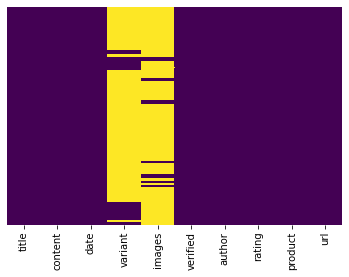

In [6]:
# checking the null Values using Heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
# get the statistics of dataset
df.describe()

,rating
count,100.000000
mean,2.700000
std,1.623688
min,1.000000
25%,1.000000
50%,2.500000
75%,4.000000
max,5.000000


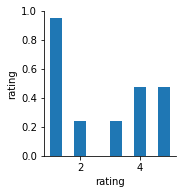

In [8]:
sns.pairplot(df)

### Step -3 : Information

#### How many Brands are there ?

In [9]:
print(df["product"].nunique())
df["product"].unique()

10


array(['Lenovo K6 Note (Silver)', 'Lenovo A6600 Plus (Black)',
       'Moto E5 Plus (Black, 3GB RAM, 32GB Storage)',
       'Motorola Moto X4 (Super Black, 32GB)',
       'Honor 7C Gold (5.99" FullView Display, 64GB)',
       'Nokia 6 (Matte Black, 32GB)', 'Nokia 6 (Silver, 32GB)',
       'Redmi 5 (Black, 3GB RAM, 32GB Storage)',
       'Nokia 8 (Polished Blue, 64GB)',
       'Motorola G5s Plus (Lunar Grey, 64GB)'], dtype=object)

#### How Many Brands of Mobile have Maximum ratings

In [10]:
print(df["product"][df["rating"] == df["rating"].max()].nunique())
print(print(df["product"][df["rating"] == df["rating"].max()].unique()))

7
['Moto E5 Plus (Black, 3GB RAM, 32GB Storage)'
 'Motorola Moto X4 (Super Black, 32GB)'
 'Honor 7C Gold (5.99" FullView Display, 64GB)'
 'Nokia 6 (Matte Black, 32GB)' 'Nokia 6 (Silver, 32GB)'
 'Redmi 5 (Black, 3GB RAM, 32GB Storage)' 'Nokia 8 (Polished Blue, 64GB)']
None


#### How many  brands has Mininum Ratings what are their names 

In [11]:
print(df["product"][df["rating"] == df["rating"].min()].nunique())
print(print(df["product"][df["rating"] == df["rating"].min()].unique()))

10
['Lenovo K6 Note (Silver)' 'Lenovo A6600 Plus (Black)'
 'Moto E5 Plus (Black, 3GB RAM, 32GB Storage)'
 'Motorola Moto X4 (Super Black, 32GB)'
 'Honor 7C Gold (5.99" FullView Display, 64GB)'
 'Nokia 6 (Matte Black, 32GB)' 'Nokia 6 (Silver, 32GB)'
 'Redmi 5 (Black, 3GB RAM, 32GB Storage)' 'Nokia 8 (Polished Blue, 64GB)'
 'Motorola G5s Plus (Lunar Grey, 64GB)']
None


#### Data Visualization

In [12]:
df1 = df.groupby(by='product').mean()

Text(0.5, 1.0, 'Brands vs Average Ratings ')

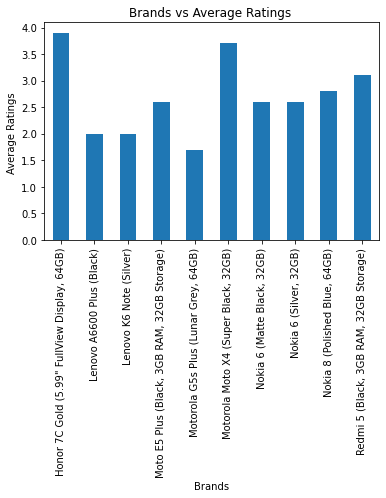

In [13]:
df1["rating"].plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Average Ratings ")
plt.title("Brands vs Average Ratings ")

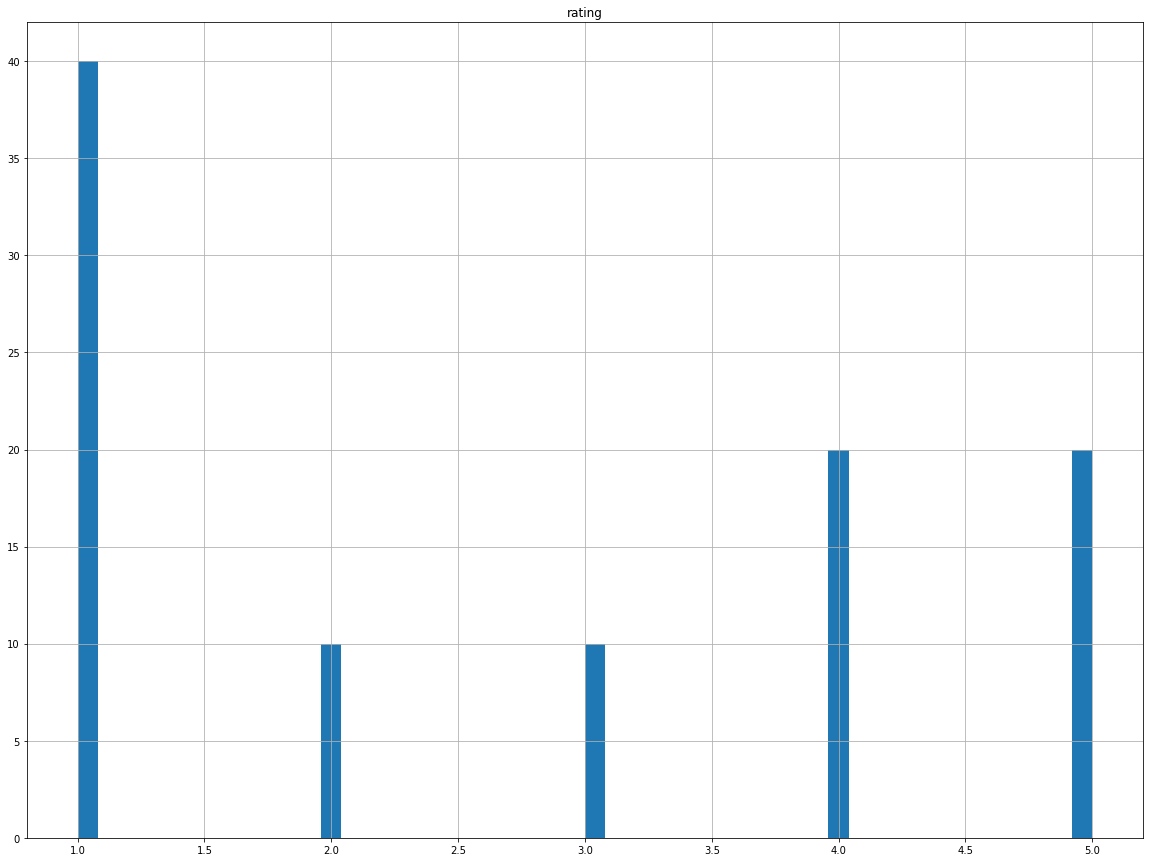

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Step - 4 : Split Data into train and Test

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

print("Before {}".format(len(df)))
dataAfter = df.dropna(subset=["rating"])

# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["rating"] = dataAfter["rating"].astype(int)

Before 100
After 100


In [16]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

# shuffling and spliting data into train and test 
for train_index, test_index in split.split(dataAfter, dataAfter["rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [17]:
print(len(strat_train))

# calculating rating range - feature scaling
strat_train["rating"].value_counts()/len(strat_train)

80


1    0.4
5    0.2
4    0.2
3    0.1
2    0.1
Name: rating, dtype: float64

In [18]:
print(len(strat_test))
strat_test["rating"].value_counts()/len(strat_test)

20


1    0.4
5    0.2
4    0.2
3    0.1
2    0.1
Name: rating, dtype: float64

### Step -5 : EDA

In [19]:
reviews = strat_train.copy()
reviews.head(5)

,title,content,date,variant,images,verified,author,rating,product,url
49,Good product,Phone is perfect for the price range but it do...,05-Oct-18,NaN,NaN,Yes,avinash dubey,4,"Honor 7C Gold (5.99"" FullView Display, 64GB)",https://www.amazon.in/Honor-Gold-5-99-FullView...
94,Over heating product from Motorola.,I disliked the product. It's overheating while...,19-Oct-18,Colour: Lunar Grey,NaN,Yes,Amazon Customer,1,"Motorola G5s Plus (Lunar Grey, 64GB)",https://www.amazon.in/Moto-Plus-Lunar-Grey-64G...
0,Defective mobile and poor service,Look wise this is good but it's performance wa...,27-Aug-19,NaN,NaN,Yes,Pankaj kumar Jha,1,Lenovo K6 Note (Silver),https://www.amazon.in/Lenovo-K6-Note-Silver/pr...
21,Delicate Product,I am a fan of Moto G series mainly due to its ...,12-Oct-18,Colour: black,NaN,Yes,Prashant Aggarwal,1,"Moto E5 Plus (Black, 3GB RAM, 32GB Storage)",https://www.amazon.in/Moto-Plus-Indigo-Black-b...
52,Though Snapdragon 430 is a Frustrating For The...,"Picture Quality - Well, Picture Is Great. Its ...",04-Dec-18,NaN,NaN,Yes,Loyal Customer,4,"Nokia 6 (Matte Black, 32GB)",https://www.amazon.in/Nokia-6-Matte-Black-32GB...


In [20]:
len(reviews["product"].unique())   # number of unique products

10

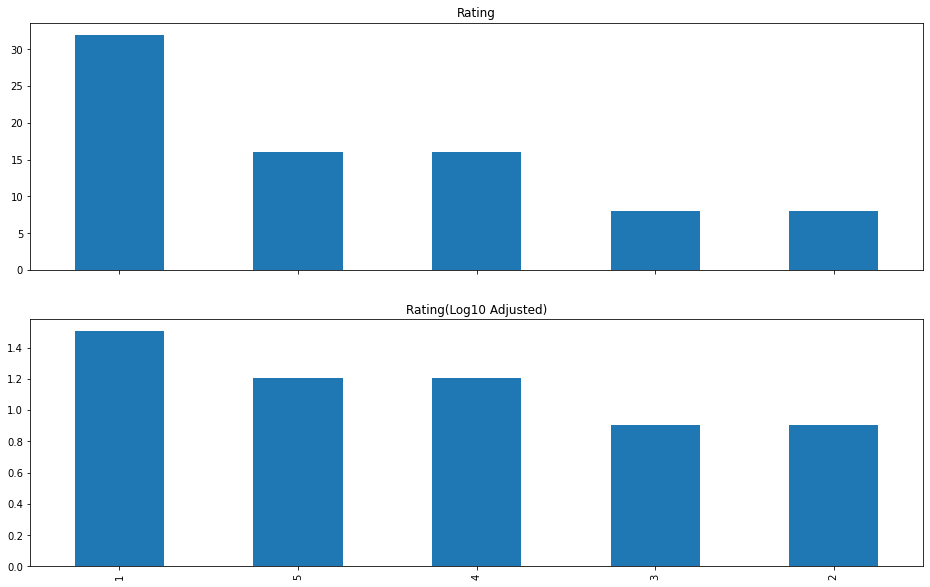

In [21]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["rating"].value_counts().plot(kind="bar", ax=ax1, title="Rating")
np.log10(reviews["rating"].value_counts()).plot(kind="bar", ax=ax2, 
                                               title="Rating(Log10 Adjusted)") 
plt.show()

#### Correlation

In [22]:
# check the correlation 

corr_matrix = reviews.corr()
corr_matrix

,rating
rating,1.0


## Step - 6 : Sentiment Analysis

### 6.1 Set Target Variable - Labels

Here I assigned the label 'Positive', 'Negative' and 'Neutral' based on rating and stored in 'Sentiments' variable

In [23]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["rating"].apply(sentiments)
strat_train["Sentiment"][:20]

49    Positive
94    Negative
0     Negative
21    Negative
52    Positive
93    Negative
44    Positive
48    Positive
13    Negative
60    Negative
19    Negative
16    Positive
81     Neutral
1     Negative
11    Negative
24    Positive
97    Negative
32    Positive
33    Positive
98     Neutral
Name: Sentiment, dtype: object

In [24]:
# Prepare data for processing

#traing dataset
X_train = strat_train["content"]
X_train_targetSentiment = strat_train["Sentiment"]

#testing dataset
X_test = strat_test["content"]
X_test_targetSentiment = strat_test["Sentiment"]

print(len(X_train), len(X_test))

80 20


### 6.2 Extract Features

Here I turn content into numerical feature vectors using the Bag of Words strategy: <br>
 - Assign fixed integer id to each word occurrence (integer indices to word occurrence dictionary)
 - X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (our training set)

In order to implement the Bag of Words strategy, we will use SciKit-Learn’s CountVectorizer to performs the following:

   - Text preprocessing:
   - Tokenization (breaking sentences into words)
   - Stopwords (filtering “the”, “are”, etc)
   - Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
   - Feature Vector (converts the dictionary of text documents into a feature vector)

In [25]:
# Replace "nan" with space

X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting

from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(80, 1469)

Here I have 80 training samples and 1463 distinct words in my training sample.

Now I will use TfidfTransformer to reduce this redundancy:

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_train_tfidf.shape

(80, 1469)

### 6.3 Building a Pipeline from the Extracted Features

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()),("tfidf", TfidfTransformer()),("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

### 6.4 Test the model

In [28]:
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.8

### Now apply other ML algorithms

#### 1. Logistics Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.8

#### 2. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.7

#### 3. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.85

#### 4. Support Vector Machine

In [32]:
from sklearn.svm import LinearSVC

clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9

Looks like all the models performed very well (>80%), and we will use the Support Vector Machine Classifier since it has the highest accuracy level at 90%.

### Step - 7 : Evaluation

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# used the accuracy_score matrix for classification 

print(classification_report(X_test_targetSentiment, predictedLinearSVC))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedLinearSVC)))

              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91        10
     Neutral       1.00      0.50      0.67         2
    Positive       1.00      0.88      0.93         8

    accuracy                           0.90        20
   macro avg       0.94      0.79      0.84        20
weighted avg       0.92      0.90      0.89        20

Accuracy: 0.9


#### Model with labels (Sentiments)

In [34]:
strat_train

,title,content,date,variant,images,verified,author,rating,product,url,Sentiment
49,Good product,Phone is perfect for the price range but it do...,05-Oct-18,NaN,NaN,Yes,avinash dubey,4,"Honor 7C Gold (5.99"" FullView Display, 64GB)",https://www.amazon.in/Honor-Gold-5-99-FullView...,Positive
94,Over heating product from Motorola.,I disliked the product. It's overheating while...,19-Oct-18,Colour: Lunar Grey,NaN,Yes,Amazon Customer,1,"Motorola G5s Plus (Lunar Grey, 64GB)",https://www.amazon.in/Moto-Plus-Lunar-Grey-64G...,Negative
0,Defective mobile and poor service,Look wise this is good but it's performance wa...,27-Aug-19,NaN,NaN,Yes,Pankaj kumar Jha,1,Lenovo K6 Note (Silver),https://www.amazon.in/Lenovo-K6-Note-Silver/pr...,Negative
21,Delicate Product,I am a fan of Moto G series mainly due to its ...,12-Oct-18,Colour: black,NaN,Yes,Prashant Aggarwal,1,"Moto E5 Plus (Black, 3GB RAM, 32GB Storage)",https://www.amazon.in/Moto-Plus-Indigo-Black-b...,Negative
52,Though Snapdragon 430 is a Frustrating For The...,"Picture Quality - Well, Picture Is Great. Its ...",04-Dec-18,NaN,NaN,Yes,Loyal Customer,4,"Nokia 6 (Matte Black, 32GB)",https://www.amazon.in/Nokia-6-Matte-Black-32GB...,Positive
...,...,...,...,...,...,...,...,...,...,...,...
41,Great product BUT .....,So the thing is I've purchased this mobile a m...,19-Oct-18,NaN,NaN,Yes,Mohit Padamata,1,"Honor 7C Gold (5.99"" FullView Display, 64GB)",https://www.amazon.in/Honor-Gold-5-99-FullView...,Negative
59,worst front camera,the metal body and design of the phone was stu...,09-Sep-17,NaN,NaN,Yes,sarat,3,"Nokia 6 (Matte Black, 32GB)",https://www.amazon.in/Nokia-6-Matte-Black-32GB...,Neutral
54,Very good,Battery is good for normal user and it will la...,07-Jul-18,NaN,NaN,Yes,Sree,5,"Nokia 6 (Matte Black, 32GB)",https://www.amazon.in/Nokia-6-Matte-Black-32GB...,Positive
82,Awesome,I have been using this phone for almost 7 mont...,18-Nov-18,NaN,https://images-na.ssl-images-amazon.com/images...,Yes,Nivya James,5,"Nokia 8 (Polished Blue, 64GB)",https://www.amazon.in/Nokia-8-Polished-Blue-64...,Positive


### Store the Result

In [35]:
# Here I store the above dataset into a csv file for future use

strat_train.to_csv('Result.csv', index=False)